### Contents :
    * A brief overview of Theano (scalar addition and beyond)    
    * Sigmoid function and symbolic differentitation in Theano
    * Regression with a simple perceptron
### A brief overview of Theano
__Define, optimize, and evaluate mathematical expressions on multi-dimensional arrays__


* Integration with NumPy - can use numpy.ndarray in Theano-compiled functions
* Uses GPU to scale performance
* Efficient symbolic differentiation (No more d/dx!!)

__It's a mathematical toolkit__


* No inbuilt machine learning models
* Developed by MILA lab at the University of Montreal (headed by Yoshua Bengio)

__What is NumPy?__


* Scientific computing package in Python on the CPU
* Provides a powerful N-dimensional array object (ndarray)
* Allows broadcasting
* Provides extensive Linear algebra methods

In [1]:
# Theano:
# Import libraries
import theano # (often imported as th)
from theano import tensor as T 
# NumPy: 
# ------
import numpy as np 
# Matplotlib:
# ------------
import matplotlib as mt 
import matplotlib.pyplot as plt # plotting module
import matplotlib.image as mpimg # display existing image
import matplotlib.gridspec as gridspec # get matplotlib layouts

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### 1. Steps involved in Theano - Scalar addition and beyond
To get us started with Theano and get a feel of what we're working with, we will create two
simple Theano-functions (adding two scalars, and adding two matrices) and test them out. We will start with the scalar addition, discussing main concepts related while doing it.
#### 1.1 Declaring variables
In Theano, all symbols must be typed. In particular, `T.dscalar`
is the type we assign to "0-dimensional arrays (`scalar`) of doubles
(`d`)"; it is a Theano `type`. In the few cells below, we declare the scalar variables that we want to later add up symbolically, and demonstrate a bit how Python interprets them.

In [2]:
# Declaration of the variables
x = T.dscalar('x')
y = T.dscalar('y')
type(x)
x.type

TensorType(float64, scalar)

#### 1.2 Symbolic expressions

The next step is to combine *x* and *y* into their sum *z*:

In [3]:
z = x + y 

*z* is yet another *Variable* which represents the addition of
*x* and *y*. You can use the `pp` function to *pretty-print* out the computation associated to *z*.


In [4]:
print(theano.printing.pp(z))

(x + y)


#### 1.3 Compiling a function

The last step is to create a Theano-function taking *x* and *y* as inputs
and giving *z* as output:

In [5]:
f = theano.function([x, y], z)

The first argument to `function()` is a list of Variables
that will be provided as inputs to the function. The second argument
is a single Variable *or* a list of Variables. For either case, the second
argument is what we want to see as output when we apply the function. *f* may
then be used like a normal Python function.


#### 1.4 Execute expression

print(f(2, 3))
print(f(16.3, 12.1))

Internally, Theano builds a graph structure composed of interconnected `Variable` nodes, `op` nodes and `apply` nodes. 

An `apply` node represents the application of an `op` to some variables. It is important to draw the difference between the definition of a computation represented by an `op` and its application to some actual data which is represented by the apply node. 

Here is the expression graph corresponding to the addition of `x` and `y`:



The output file is available at samplepydot.png


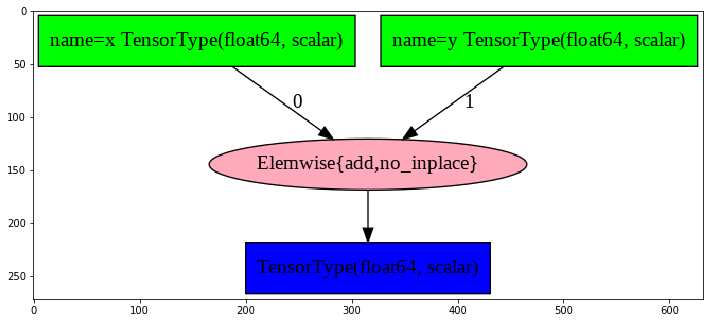

In [6]:
theano.printing.pydotprint(f,outfile="samplepydot.png")

mt.rcParams['figure.figsize'] = (12,6)
img01 = mpimg.imread('samplepydot.png')
p01   = plt.imshow(img01)
plt.show()

A *Variable* is the main data structure you work with when
using Theano. By calling `T.dscalar` with a string argument, you create a
`Variable` representing a floating-point scalar quantity with the
given name. If you provide no argument, the symbol will be unnamed. Names
are not required, but they can help debugging.

#### 1.5 Adding two matrices

In [7]:
X = T.dmatrix('X')
Y = T.dmatrix('Y')
Z = X + Y
f = theano.function([X, Y], Z)
f([[1, 2], [3, 4]],[[10, 20], [30, 40]])

array([[11., 22.],
       [33., 44.]])

### 2. The logistic sigmoid function

#### 2.1 The function in NumPy

Let us now generate a vector of floating point values over which we would evaluate the logistic sigmoid function defined above and plot it.

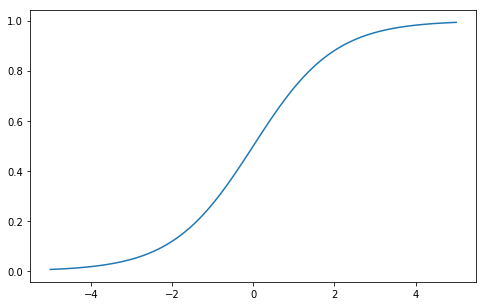

In [8]:
# Generate 100 points equally spaced in [-5,5]
x = np.linspace(-5,5,100) 
def np_sigmoid(x):
    return 1./(1. + np.exp(-x)) # note: element-wise evaluation for non-scalars

# evaluate the logistic sigmoid function at each of the points
np_sigmoid_output = np_sigmoid(x)
# plot the evalutions 
mt.rcParams['figure.figsize'] = (8,5)
plt.plot(x,np_sigmoid_output)
plt.show()

#### 2.2 The function in Theano
Let us now define the sigmoid function in **Theano**, note how similar it looks to the NumPy sigmoid function definition.

Note that there is an inbuilt function **theano.tensor.nnet.sigmoid** which we will be using in later part of the demo. 

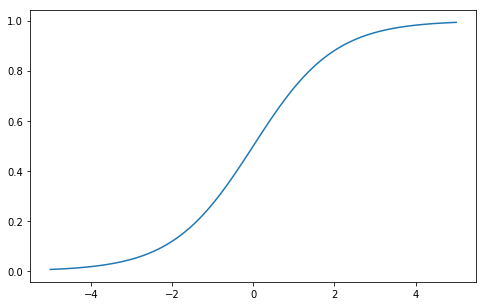

0.0

In [9]:
# using the th_ prefix for theano symbolic variables and functions
th_x = T.dscalar('x') 
th_sigmoid = 1./(1. + T.exp(-th_x))

# using the th_ prefix to distinguish theano function names.
th_sigmoid_f = theano.function(inputs=[th_x], outputs=th_sigmoid) 

# We evaluate the theano function by looping over x.
th_sigmoid_output = []
for element in x:
    th_sigmoid_output.append(th_sigmoid_f(element))
    
# Now we can plot the x evaluated using the sigmoid 
# function defined in theano
plt.plot(x,th_sigmoid_output)
plt.show()

np.sum(abs(np_sigmoid_output - th_sigmoid_output))

We then use this result to implement a function for evaluating the derivative using **NumPy**:

In [10]:
def np_sigmoid_grad(x):
    return np_sigmoid(x)*(1.-np_sigmoid(x)) # note: element-wise evaluation for non-scalars

Let us now evaluate the function at each of the points defined by the NumPy-variable x, and plot the results:

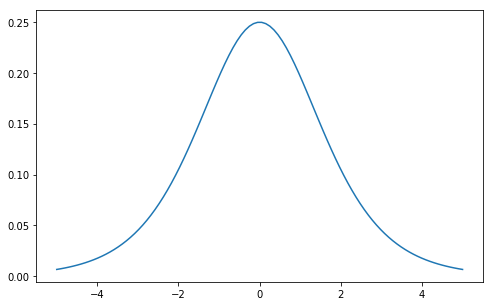

In [11]:
plt.plot(x, np_sigmoid_grad(x))
plt.show()

You can implement the analytically calculated gradient using Theano and the output would be same. Try it out for yourself !

#### 2.4 Symbolic differentiation in Theano
We will now use Theano's automatic differentiation `T.grad(cost,wrt)` to calculate the gradient of the sigmoid function 

**NOTE:** We will re-use the **sym_sigmoid** Theano expression for sigmoid defined earlier.

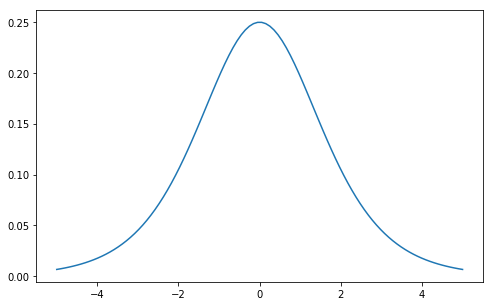

In [12]:
# T.grad computes derivative of 'th_sigmoid' function at values 'th_x'
th_sigmoid_grad = T.grad(th_sigmoid,th_x)
th_sigmoid_grad_f = theano.function(inputs=[th_x],
                                    outputs=th_sigmoid_grad)

th_sigmoig_grad_output = [th_sigmoid_grad_f(element) for element in x]
plt.plot(x, th_sigmoig_grad_output)
plt.show()

Looks same as the the analytically calculated gradient !

### 3. Demo - Regression with a simple perceptron

#### 3.1 Training data

First lets load some simulated data for our exercise, here we use NumPy to create a noisy sine wave signal. 

We will be using the same structure for the data to be provided in the home assignment.

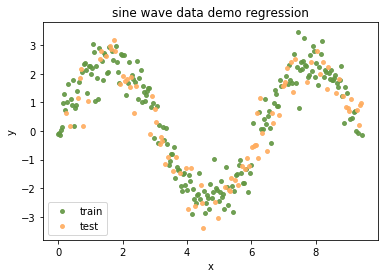

In [13]:
# load data
Xtrain = np.loadtxt("files/sinewave_Xtrain.txt") 
Ytrain = np.loadtxt("files/sinewave_Ytrain.txt") 
Xtest = np.loadtxt("files/sinewave_Xtest.txt") 
Ytest = np.loadtxt("files/sinewave_Ytest.txt") 


# reshape the dimensions
Xtrain = Xtrain.reshape(-1,1)
Xtest = Xtest.reshape(-1,1)
# visualize data
mt.rcParams['figure.figsize'] = (8,5)
% matplotlib inline
plt.scatter(Xtrain,Ytrain,c = "#639743",alpha = 0.9,s=15,label="train")
plt.scatter(Xtest,Ytest,c = "#ffad60",alpha = 0.9,s=15,label="test")
plt.title("sine wave data demo regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

The following block provides functionality to visualize training of single layer perceptrons with 1-D input. Understanding of the plotting code is not needed for the exercise. However don't forget to run the cell

In [14]:
def plotmodel1D(Xtrain, Ytrain, Xtest, Ytest, pred_train, pred_test, err_train,
                err_test, nactivation, training_steps):
    mt.rcParams['figure.figsize'] = (6, 8)
    '''
    Xtrain : N x 1 array : train input vector
    Ytrain : N x 1 array : train target vector
    Xtest  : N x 1 array : test input vector
    Ytest  : N x 1 array : test target vector
    pred_train : N x 1 array : predictions on train set
    pred_test  : N x 1 array : predictions on test set
    err_train  : scalar : error on train set for the current iteration
    err_test   : scalar : error on test set for the current iteration
    nactivation  : N x h array : activation output from 'h' hidden neurons on the training data
    training_steps : scalar : maximum number of iterations, to set the range of x axis in the beginning
    '''

    if plt.fignum_exists(121):
        fig = plt.figure(121)

        ax1 = fig.axes[0]
        ax1.lines[0].set_ydata(pred_train)

        ax2 = fig.axes[1]
        for line, nact in zip(ax2.lines, nactivation.T):
            line.set_ydata(nact)

        ax3 = fig.axes[2]
        ax3.lines[0].set_xdata(
            np.append(ax3.lines[0].get_xdata(),
                      ax3.lines[0].get_xdata()[-1] + 1000))
        ax3.lines[0].set_ydata(np.append(ax3.lines[0].get_ydata(),
                                         err_train))
        
        ax3.lines[1].set_xdata(
            np.append(ax3.lines[1].get_xdata(),
                      ax3.lines[1].get_xdata()[-1] + 1000))
        ax3.lines[1].set_ydata(np.append(ax3.lines[1].get_ydata(),
                                         err_test))

    else:
        itr = 1
        fig, (ax1, ax2, ax3) = plt.subplots(3, num=121)

        ax1.set_title("Demo : A simple perceptron")
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_xlim(1.3 * Xtrain.min(), 1.05 * Xtrain.max())
        ax1.set_ylim(1.3 * Ytrain.min(), 1.3 * Ytrain.max())
        ax1.scatter(
            Xtrain, Ytrain, c="#639743", alpha=0.5, s=15, label="train")
        ax1.scatter(Xtest, Ytest, c="#ffad60", alpha=0.5, s=15, label="test")
        ax1.plot(
            Xtrain,
            pred_train,
            "--",
            c="#970000",
            linewidth=2.0,
            label="model fit")
        ax1.legend(loc=4)

        ax2.set_xlabel('x')
        ax2.set_ylabel('hidden layer activations')
        ax2.set_ylim(-0.1, 1.1)
        ax2.plot(Xtrain, nactivation)

        ax3.set_xlabel('number of iterations')
        ax3.set_ylabel('mse')
        ax3.plot(itr, err_train, c="#27ae61", label="train")
        ax3.plot(itr, err_test, c="#c1392b", label="test")
        ax3.set_ylim(-1, max(err_train, err_test) * 1.2)
        ax3.set_xlim(1, training_steps * 1000)
        ax3.legend()

    fig.canvas.draw()

In the below section, a single layer perceptron with architecture as shown below is implemented. One hidden layer with sigmoidal activation function transforms data non-linearly. Outputs from each of these neuron is scaled with some weights along with a bias and summed to form the output.

In [15]:
# define input and output variables in theano
# value: input data
# shape : N x 1  (same as NumPy array)
X = T.matrix('X') 

# value : target vector
# shape : N x __ (same as NumPy array)
y = T.vector('y') # will have N x __ shape


# parameters to be set for the achitecture/training
nn1 = 4 # NumberOfHiddenNeurons
training_steps = 50000  # number of training iterations
alpha = 0.1  # learning rate


# NOTE : 
# variables of theano type 'dmatrix' are not broadcastable
# initializing a theano shared variable with a NumPy array of shape (N,1) makes it a 'dmatrix'
# whenever broadcasting is needed, intialize it as a vector
# initializing a theano shared variable with a NumPy array of shape (N,) makes it a 'dvector'

# weights for input - the hidden layer conenction
# value : radom gaussian initialization
# shape : (1 x NumberOfHiddenNeurons)
# type  : dmatrix
np.random.seed(1232)
w1 = theano.shared(np.random.randn(1, nn1), name='w1') 


# bias to neurons in the hidden layer
# value : initialized to zeros
# shape : (NumberOfHiddenNeurons x __)
# type  : dvector
b1 = theano.shared(np.zeros((nn1,)), name='b1')       


# weights for hidden - output layer connection
# value : random gaussian intialization
# shape : (NumberOfHiddenNeurons x __)
# type  : dvector
np.random.seed(1232)
wout = theano.shared(
    np.random.randn(nn1,), name='wout')                           


# bias to output layer
# value : initialized to zero
# shape : (1 x __)
# type  : dvector
bout = theano.shared(0., name='bout') 


# hidden layer output
# value :  X*w1 + b1 
# shape : (N x 1)*(1 x NumberOfHiddenNeurons) + (NumberOfHiddenNeurons x __)
#       : (N x NumberOfHiddenNeurons) + (NumberOfHiddenNeurons x __) {BROADCAST}
#       : (N x NumberOfHiddenNeurons) 
# type  : dmatrix
# http://deeplearning.net/software/theano/tutorial/broadcasting.html
hout = theano.tensor.nnet.sigmoid(T.dot(X, w1) + b1)   


# perceptron predictions
# value : hout * wout + bout
# shape : (N x NumberOfHiddenNeurons) * (NumberOfHiddenNeurons x __) + (1 X __)
#       : (N x __) + (1 X __) {BROADCAST}
#       : (N x __)
# type  : dvector
# --- Note that ypred is of same shape as y --- 
ypred = T.dot(hout, wout) + bout
test = theano.function(inputs=[X], outputs=[ypred])


# mean squared error as cost function
cost = T.mean((ypred - y)**2)


# gradient computation : gradient of cost function with respect to weights & bias
# used for parameter updates according to gradient descent algorithm
gw1, gb1, gwout, gbout = T.grad(cost, [w1, b1, wout, bout])


# now we connect everything into a single theano function
# Input   :  X, y are intput data, target vector respectively
# Output  :  prediction, cost (error) and hidden-layer activations
# Update  :  update equation for paramters to be learned : w_t+1 = w_t - (learning_rate * gradient)
updates  =  [(w1, w1 - alpha * gw1), 
             (b1, b1 - alpha * gb1),
             (wout, wout - alpha * gwout), 
             (bout, bout - alpha * gbout)] 

train_model = theano.function(
    inputs=[X, y],
    outputs=[ypred, cost, hout,wout,bout],
    updates=updates)


# function 
# compute prediction on unseen test data
# Input   : x, y are intput, target vectors respectively
# Output  :  list of predictions
predict_model = theano.function(inputs=[X], outputs=[ypred])


# function 
# compute cost on test data
# Input   : x, y are intput, target vectors respectively
# Output  : scalar cost
cost_function = theano.function(inputs=[X,y], outputs=cost)

#### 3.4 Training and visualization

<IPython.core.display.Javascript object>


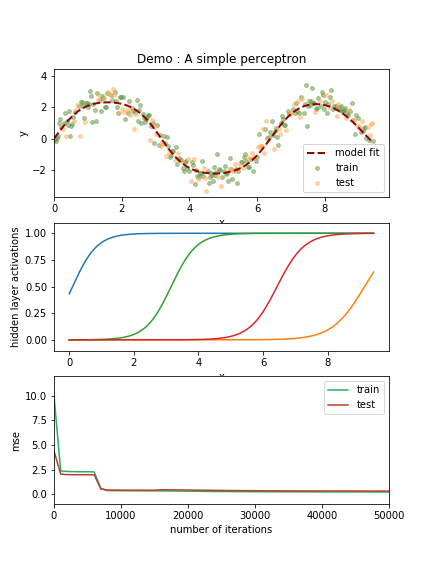

final train set cost : 0.2243
final test set cost  : 0.3154
ouput layer weights :  [ 4.41960676 -4.65621856 -4.9491772   5.14068346]
ouput layer bias :  -1.9060189659816786


<IPython.core.display.Javascript object>


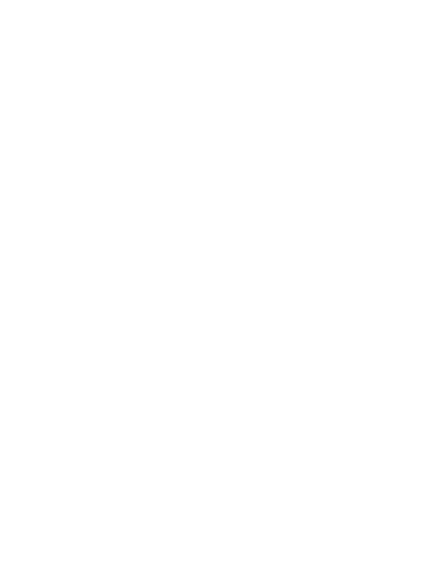

In [16]:
%matplotlib notebook

# call traning function for pre-defined iterations
for ii in np.arange(1,training_steps+1):

    # run train function and get predictions and error on train set
    # nactivation is the hidden layer neuron activations for the second subplot
    # nwout, nbout are hidden-output layer weights and bias respectively
    pred_train, cost_train, nactivation, nwout, nbout = train_model(Xtrain, Ytrain)

    # get predictions on test set
    pred_test = predict_model(Xtest)
    cost_test = cost_function(Xtest,Ytest)

    if (ii==1 or ii % 1000 == 0):
        plotmodel1D(Xtrain, Ytrain, Xtest, Ytest, 
                    pred_train, pred_test, cost_train, cost_test,
                    nactivation, training_steps/1000)

print("final train set cost : %.4f"%cost_train)
print("final test set cost  : %.4f"%cost_test)
print("ouput layer weights : ",nwout)
print("ouput layer bias : ",nbout)